In [1]:
import numpy as np
import pandas as pd
import random
#from sklearn import linear_model
#from sklearn.metrics import mean_absolute_error, mean_squared_error
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import itertools
import h5py
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing import image
#from keras.applications import resnet50


Using TensorFlow backend.


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Input data: Catalog.json

In [5]:
df_ok = pd.read_csv('/Users/camilaburne/UT/Data Mining/Data-Mining-ECE-280/LIGO/df_predictors.csv')

### Exploratory Data Analysis 

### 3D Chart at [rpub link](https://rpubs.com/CamilaBurneUT/remnant_mass_eta_seff)

In [6]:
X = df_ok[['reference_mass_ratio',
       'reference_chi_eff',
       'reference_chi1_perp', 'reference_chi2_perp', 'reference_mass1',
       'reference_mass2', 'reference_dimensionless_spin1_1',
       'reference_dimensionless_spin1_2', 'reference_dimensionless_spin1_3',
       'reference_dimensionless_spin2_1', 'reference_dimensionless_spin2_2',
       'reference_dimensionless_spin2_3', 'precessing', 'notspinning', 's1',
       's2', 'eta', 's1_sum', 's2_sum', 's3_sum', 'm1+m2', 'seff']]

y = df_ok['remnant_mass']

y1 = df_ok['remnant_dimensionless_spin_1']
y2 = df_ok['remnant_dimensionless_spin_2']
y3 = df_ok['remnant_dimensionless_spin_3']


### From now on is NN 

This is just a test to implement the following model
$$m_f=\omega_0+\omega_1 q+\omega_2 \chi^1_x+\omega_3 \chi^1_y+\omega_4 \chi^1_z+\omega_5 \chi^2_x+\omega_6 \chi^2_y+\omega_7 \chi^2_z$$

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
#X_train = X.sample(frac=0.6, replace=True, random_state=1)
#X_test  = X.sample(frac=0.4, replace=True, random_state=1)
#y_train = y.sample(frac=0.6, replace=True, random_state=1)
#y_test  = y.sample(frac=0.4, replace=True, random_state=1)


#### Checking distribution of X in test vs train 

In [38]:
X_train.precessing.value_counts(normalize=True)

1    0.695767
0    0.304233
Name: precessing, dtype: float64

In [39]:
X_test.precessing.value_counts(normalize=True)

1    0.732143
0    0.267857
Name: precessing, dtype: float64

In [ ]:
X_train.notspinning.value_counts(normalize=True)

In [ ]:
X_test.notspinning.value_counts(normalize=True)

In [ ]:
sns.displot(X_test.reference_mass1, kde=True)
plt.show()

In [ ]:
sns.displot(X_train.reference_mass1, kde=True)
plt.show()

In [ ]:
sns.displot(y_train, kde=True)
plt.show()

In [ ]:
sns.displot(y_test, kde=True)
plt.show()

### Linear Reg

In [10]:
Reg_Linear = linear_model.LinearRegression()
Linear_fit = Reg_Linear.fit(X_train,y_train)
Linear_predict = Linear_fit.predict(X_test)
mse_Linear = mean_squared_error(y_test,Linear_predict)
#Rsquared_Linear=Linear_fit.score(X_test,y_test)
#Rsquared_Linear_2=Linear_fit.score(X_train,y_train)

In [11]:
Linear_fit

LinearRegression()

In [12]:
mse_Linear

7.319456422266982e-06

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing import image
#from keras.applications import resnet50


<h3><font color='#07a4b3'> Neural Networks </font></h3>


``` 
    lay     act  nodes  opt    lr     epoch   momtm  *error*
m1    3    relu    256  adam   0.001    200          3.80e-06
m2    3    relu    256  SGD    0.001    200   0.001  0.00091
m3    4    relu    256  adam   0.001    200          1.26e-05
m4    5    relu   4096  adam   0.001    200          2.44e-06
``` 
<h3><font color='#f16913'> Random Forest Regressor </font></h3>

``` 
     depth                                           *error* 
r1       3                                           2.28e-05
``` 

## m1

In [13]:
m1 = Sequential(name="M1")
m1.add(Dense(50 , input_dim=22, activation="relu",   name="layer1"))
m1.add(Dense(256, activation="relu",   name="layer2"))
m1.add(Dense(1  , activation='linear', name="layer3"))

o1 = keras.optimizers.Adam(learning_rate=0.001)
m1.compile(loss='mean_squared_error', optimizer=o1)

In [15]:
# Fit the model
history = m1.fit(X_train,y_train,epochs=200,shuffle=True,verbose=0)

In [18]:
test_error_m1 = m1.evaluate(X_test, y_test, verbose=0)

In [19]:
test_error_m1

3.8035329474777904e-06

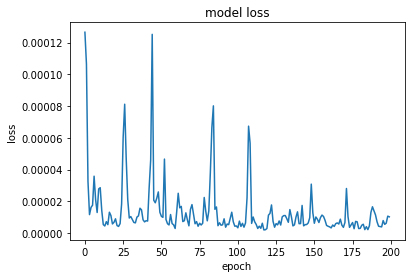

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



## m2

In [20]:
m2 = Sequential(name="M2")
m2.add(Dense(50 , input_dim=22, activation="relu",   name="layer1"))
m2.add(Dense(256, activation="relu",   name="layer2"))
m2.add(Dense(1  , activation='linear', name="layer3"))

o1 = keras.optimizers.SGD(learning_rate=0.001, momentum=0.001)
m2.compile(loss='mean_squared_error', optimizer=o1)

In [23]:
# Fit the model
history2 = m2.fit(X_train,y_train,epochs=200,shuffle=True,verbose=0)
test_error_m2 = m2.evaluate(X_test, y_test, verbose=0)
test_error_m2

0.0009158195609906836

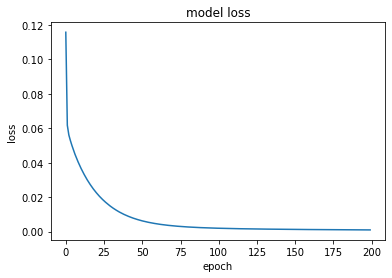

In [24]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



## m3

In [26]:
m3 = Sequential(name="M3")
m3.add(Dense(50 , input_dim=22, activation="relu",   name="layer1"))
m3.add(Dense(256, activation="relu",   name="layer2"))
m3.add(Dense(64, activation="relu",    name="layer3"))
m3.add(Dense(1  , activation='linear', name="layer4"))

o1 = keras.optimizers.Adam(learning_rate=0.001)
m3.compile(loss='mean_squared_error', optimizer=o1)

In [28]:
# Fit the model
history3 = m3.fit(X_train,y_train,epochs=200,shuffle=True,verbose=0)
test_error_m3 = m3.evaluate(X_test, y_test, verbose=0)
test_error_m3

1.2618842418536559e-05

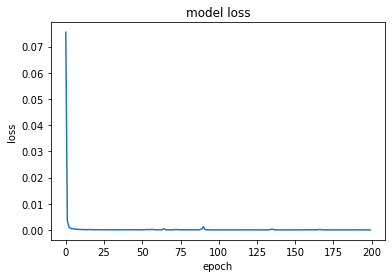

In [29]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



## m4 - same as paper 

In [31]:
m4 = Sequential(name="M4")
m4.add(Dense(4096 , input_dim=22, activation="relu",   name="layer1"))
m4.add(Dense(256, activation="relu",   name="layer2"))
m4.add(Dense(64,  activation="relu",   name="layer3"))
m4.add(Dense(8  , activation='relu',   name="layer4"))
m4.add(Dense(1  , activation='linear', name="lastlayer"))

o1 = keras.optimizers.Adam(learning_rate=0.001)
m4.compile(loss='mean_squared_error', optimizer=o1)

In [32]:
# Fit the model
history4 = m4.fit(X_train,y_train,epochs=200,shuffle=True,verbose=0)
test_error_m4 = m4.evaluate(X_test, y_test, verbose=0)
test_error_m4

2.4427524496988754e-06

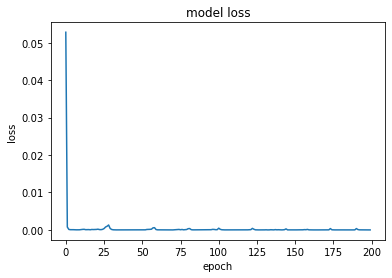

In [33]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


## Random Forest model 


In [41]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
r1   = regr.fit(X_train, y_train)

In [44]:
pred = r1.predict(X_test)

In [46]:
mean_squared_error(y_test, pred)

2.288166719191613e-05